In [1]:
import tensorflow as tf
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,MaxPool2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#step 3 - Prepare dataset for training model:

train_data_dir = "G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/mydata/training_set"

test_data_dir = "G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/mydata/test_set"

In [3]:
from glob import glob
glob("G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/mydata/training_set/*/")

['G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/mydata/training_set\\A\\',
 'G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/mydata/training_set\\B\\',
 'G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/mydata/training_set\\C\\',
 'G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/mydata/training_set\\D\\',
 'G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/mydata/training_set\\E\\',
 'G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/mydata/training_set\\F\\',
 'G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/mydata/training_set\\G\\',
 'G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/mydata/training_set\\H\\',
 'G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/mydata/training_set\\I\\',
 'G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/mydata/training_set\\J\\',
 'G:/final

In [4]:
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [5]:
trainGen = ImageDataGenerator(rescale=1/255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)

testGen = ImageDataGenerator(rescale=1./255)

In [6]:
img_width, img_height = 64, 64
train = trainGen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),classes = labels,
    batch_size =32 ,
    class_mode='categorical',shuffle=True)

test = testGen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),classes = labels,
    batch_size =32 ,
    class_mode='categorical',shuffle=True)


Found 45500 images belonging to 26 classes.
Found 6500 images belonging to 26 classes.


In [7]:
#step 7 - Create the CNN model:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape= (img_height,img_width,3),
         padding = "same",activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3),padding = "same", activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(32,3,3,activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation = 'softmax'))

#step 8 -Analyzing model:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

In [8]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
model.fit(train, validation_data=test, epochs=25, steps_per_epoch=800,validation_steps = 6500)

model.save("G:/final year 8th sem project/sign_alphabet/model5.h5")

Epoch 1/25
800/800 [==============================] - 390s 468ms/step - loss: 1.6948 - accuracy: 0.4807 - val_loss: 0.2084 - val_accuracy: 0.9551
Epoch 2/25
800/800 [==============================] - 295s 369ms/step - loss: 0.3791 - accuracy: 0.8662 - val_loss: 0.1566 - val_accuracy: 0.9828
Epoch 3/25
800/800 [==============================] - 285s 357ms/step - loss: 0.2543 - accuracy: 0.9137 - val_loss: 0.1873 - val_accuracy: 0.9767
Epoch 4/25
800/800 [==============================] - 299s 374ms/step - loss: 0.2000 - accuracy: 0.9321 - val_loss: 0.2133 - val_accuracy: 0.9759
Epoch 5/25
800/800 [==============================] - 276s 345ms/step - loss: 0.1588 - accuracy: 0.9461 - val_loss: 0.1512 - val_accuracy: 0.9814
Epoch 6/25
800/800 [==============================] - 286s 358ms/step - loss: 0.1409 - accuracy: 0.9533 - val_loss: 0.1673 - val_accuracy: 0.9842
Epoch 7/25
800/800 [==============================] - 281s 352ms/step - loss: 0.1194 - accuracy: 0.9611 - val_loss: 0.2061 -

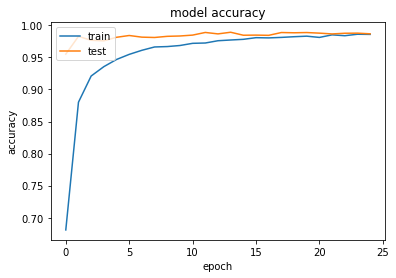

In [19]:
import matplotlib.pyplot as plt
import numpy

# summarize history for accuracy

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

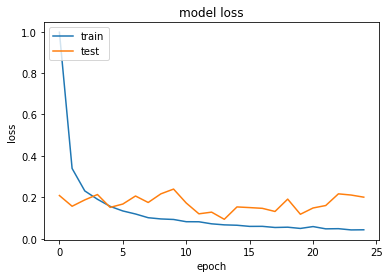

In [20]:
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#######Sign number ########

Reading images for number 0
Reading images for number 1
Reading images for number 2
Reading images for number 3
Reading images for number 4
Reading images for number 5
Reading images for number 6
Reading images for number 7
Reading images for number 8
Reading images for number 9
(2394, 100, 100, 1) (267, 100, 100, 1) (2394, 10) (267, 10)


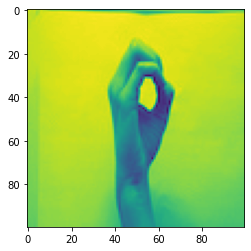

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Epoch 1/47
19/19 [==============================] - 28s 1s/step - loss: 2.4207 - accuracy: 0.1003 - val_loss: 2.2933 - val_accuracy: 0.1311
Epoch 2/47
19/19 [==============================] - 16s 857ms/step - loss: 2.2268 - accuracy: 0.2009 - val_loss: 1.9805 - val_accuracy: 0.4007
Epoch 3/47
19/19 [==============================] - 16s 837ms/step - loss: 1.7111 - accuracy: 0.3956 - val_loss: 1.3633 - val_accuracy: 0.5618
Epoch 4/47
19/19 [==============================] - 16s 863ms/step - loss: 1.2255 - accuracy: 0.5706 - val_loss: 1.0510 - val_accuracy: 0.6854
Epoch 5/47
19/19 [==============================] - 16s 843ms/step - loss: 0.9474 - accuracy: 0.6708 - val_loss: 0.9314 - val_accuracy: 0.6891
Epoch 6/47
19/19 [==============================] - 16s 842ms/step - loss: 0.8250 - accuracy: 0.7281 - val_loss: 0.8239 - val_accuracy: 0.7678
Epoch 7/47
19/19 [==============================] - 16s 844ms/step - loss: 0.6889 - accuracy: 0.7694 - val_loss: 

In [1]:
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Conv2D, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import os
import cv2


def load_data(path):
    #X is the training set, Y is the train lables
    X = np.zeros((1,100,100,1), dtype=float)
    Y = np.zeros((1,10),dtype=float)

    # reading images, converting to grayscale and adding them to array
    for i in os.listdir(path):
        print(f"Reading images for number {i}")
        for j in os.listdir(f'{path}/{i}'):
            img = cv2.imread(f'{path}/{i}/{j}')
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            try:
                assert np.prod(gray.shape) == 10000
            except AssertionError as e:
                gray = cv2.resize(gray, (100,100))
            gray = gray/255
            gray = gray.reshape(1,100,100,1)
            X = np.vstack((X,gray))
            y = np.zeros((1,10))
            y[0,int(i)] = 1
            Y = np.vstack((Y,y))
    return X,Y

def preprocess_data(X,Y):    
    # removing the zeros array and shuffling the data
    X = X[1:,:,:,:]
    Y = Y[1:,:]
    X,Y = shuffle(X,Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)
    print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    return X_train, X_test, Y_train, Y_test

#visualizing the images
def visualize_data(X, Y, image_number=10):
    plt.imshow(X[image_number,:,:].reshape(100,100))
    plt.show()
    print(Y[image_number])

#defining the model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, padding="same",  input_shape=(100, 100, 1), activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=512, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(units=128, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units=10, activation="softmax"))
    return model

#training the model
def train_model(model):
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
    model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=47, batch_size=128)
    return model

if __name__ == "__main__":
    path = "./Dataset"
    X,Y = load_data(path)
    X_train, X_test, Y_train, Y_test = preprocess_data(X,Y)
    image_number = 10
    visualize_data(X, Y, image_number)
    model = define_model()
    model = train_model(model)
    #saving the model
    #model.save("G:/final year 8th sem project/Sign-Numbers/model.h5")


In [ ]:
from keras.models import load_model

model_dir = 'G:/final year 7th sem project/Sign-Language-Recognizer-master/model1.h5'
model1 = load_model(model_dir)
model1.summary()

In [ ]:
#Implementation

In [1]:
import cv2
import numpy as np

def alpha():
    


    def nothing(x):
        pass

    image_x, image_y = 64,64

    from keras.models import load_model
    classifier = load_model('G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/Trained_model.h5')

    def predictor():
           import numpy as np
           from keras.preprocessing import image
           test_image = image.load_img('G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/1.png', target_size=(64, 64))
           test_image = image.img_to_array(test_image)
           test_image = np.expand_dims(test_image, axis = 0)
           result = classifier.predict(test_image)

           if result[0][0] == 1:
                  return 'A'
           elif result[0][1] == 1:
                  return 'B'
           elif result[0][2] == 1:
                  return 'C'
           elif result[0][3] == 1:
                  return 'D'
           elif result[0][4] == 1:
                  return 'E'
           elif result[0][5] == 1:
                  return 'F'
           elif result[0][6] == 1:
                  return 'G'
           elif result[0][7] == 1:
                  return 'H'
           elif result[0][8] == 1:
                  return 'I'
           elif result[0][9] == 1:
                  return 'J'
           elif result[0][10] == 1:
                  return 'K'
           elif result[0][11] == 1:
                  return 'L'
           elif result[0][12] == 1:
                  return 'M'
           elif result[0][13] == 1:
                  return 'N'
           elif result[0][14] == 1:
                  return 'O'
           elif result[0][15] == 1:
                  return 'P'
           elif result[0][16] == 1:
                  return 'Q'
           elif result[0][17] == 1:
                  return 'R'
           elif result[0][18] == 1:
                  return 'S'
           elif result[0][19] == 1:
                  return 'T'
           elif result[0][20] == 1:
                  return 'U'
           elif result[0][21] == 1:
                  return 'V'
           elif result[0][22] == 1:
                  return 'W'
           elif result[0][23] == 1:
                  return 'X'
           elif result[0][24] == 1:
                  return 'Y'
           elif result[0][25] == 1:
                  return 'Z'




    cam = cv2.VideoCapture(0)

    cv2.namedWindow("Trackbars")

    cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)
    cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)
    cv2.createTrackbar("L - V", "Trackbars", 0, 255, nothing)
    cv2.createTrackbar("U - H", "Trackbars", 179, 179, nothing)
    cv2.createTrackbar("U - S", "Trackbars", 255, 255, nothing)
    cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)

    cv2.namedWindow("test")

    img_counter = 0

    img_text = ''
    while True:
        
        ret, frame = cam.read()
        frame = cv2.flip(frame,1)
        l_h = cv2.getTrackbarPos("L - H", "Trackbars")
        l_s = cv2.getTrackbarPos("L - S", "Trackbars")
        l_v = cv2.getTrackbarPos("L - V", "Trackbars")
        u_h = cv2.getTrackbarPos("U - H", "Trackbars")
        u_s = cv2.getTrackbarPos("U - S", "Trackbars")
        u_v = cv2.getTrackbarPos("U - V", "Trackbars")


        img = cv2.rectangle(frame, (425,100),(625,300), (0,255,0), thickness=2, lineType=8, shift=0)

        lower_blue = np.array([l_h, l_s, l_v])
        upper_blue = np.array([u_h, u_s, u_v])
        imcrop = img[102:298, 427:623]
        hsv = cv2.cvtColor(imcrop, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, lower_blue, upper_blue)

        cv2.putText(frame, img_text, (30, 400), cv2.FONT_HERSHEY_TRIPLEX, 1.5, (0, 255, 0))
        cv2.imshow("Sign Alphabet", frame)
        cv2.imshow("mask", mask)

        #if cv2.waitKey(1) == ord('c'):

        img_name = "G:/final year 7th sem project/kk/Simple-Sign-Language-Detector-master/1.png"
        save_img = cv2.resize(mask, (image_x, image_y))
        cv2.imwrite(img_name, save_img)
        print("{} written!".format(img_name))
        img_text = predictor()


        if cv2.waitKey(1) == 27:
            break


    cam.release()
    cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def number():
    import cv2
    import numpy as np
    from tensorflow.keras.models import load_model

    def loadModel(model_path):
        model = load_model(model_path)
        model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
        return model

    def predict(img, model):
        try:
            assert img.shape == (1,100,100,1)
        except:
            raise ValueError("Invalid image dimensions")

        digits_array = model.predict(img)     
        digits_array = np.squeeze(digits_array)
        digit = np.where(digits_array==np.max(digits_array))[0]
        return digit

    def findHand(img):
        hand = img[100:300,100:300]
        hand = cv2.cvtColor(hand, cv2.COLOR_BGR2GRAY)
        hand = cv2.resize(hand, (100,100))
        hand = hand/255
        hand = hand.reshape(1,100,100,1) 
        return hand

    if __name__ == "__main__":
        font = cv2.FONT_HERSHEY_SIMPLEX
        model_path = "G:/final year 8th sem project/Sign_numbers/model.h5"
        model = loadModel(model_path)
        cap = cv2.VideoCapture(0)
        while(True):
            ret,frame = cap.read()
            frame = cv2.flip(frame,1)
            cv2.rectangle(frame, (100,100), (300,300), (20,34,255),2)
            hand = findHand(frame)
            digit = predict(hand, model)[0]
            cv2.putText(frame,str(digit), (350,350),font,2,(100,200,25),3, cv2.LINE_AA)
            cv2.imshow("Hand Sign Digit", frame)
            key = cv2.waitKey(1)
            if key == 27:
                break

        cap.release()
        cv2.destroyAllWindows()


In [ ]:
from tkinter import *
from tkinter import messagebox

root = Tk()
root.geometry("900x500+200+50")
root.resizable(FALSE,FALSE)
title = Label(root,text ="Sign Language Detection Application", font =("times new roman",30),bg ="#0a064f",fg = "white")
title.place(x=0,y=60,relwidth=1)


title = Label(root,text ="LISTENING TO THE DEAF COMMUNITY ", font =("times new roman",30),fg = "#000000")
title.place(x=70,y=200)

title = Label(root,text ="This application recognizes all the 26 alphabets and  ", font =("times new roman",20),fg = "#ff0000")
title.place(x=70,y=270)

title = Label(root,text ="10 numbers of american  sign language.", font =("times new roman",20),fg = "#ff0000")
title.place(x=70,y=300)




btn = Button(root,text ="Alphabet", font =("times new roman",15),bg ="#326fa8",fg = "white", command = alpha)
btn.place(x=80,y=400)

btn1 = Button(root,text ="Numbers", font =("times new roman",15),bg ="#326fa8",fg = "white", command = number)
btn1.place(x=700,y=400)

root.mainloop()